In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat



In [26]:
#loading the data 

df1 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 0)

df2 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 1)

df3 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 2)




In [67]:
df_species = df1.copy()
df_sites = df2.copy()
df_observations = df3.copy()

In [68]:
#removing empty columns
del df_species["Unnamed: 0"]
del df_species["Unnamed: 1"]

df_species.columns = ["French Name", "Latin Name", "Origin"]
df_species.loc[len(df_species)] = ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']

# ligne à ajouter (elle est prise pour les noms des colonnes au chargement)
# ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']


del df_sites["Unnamed: 0"]
del df_sites["Unnamed: 1"]

# removing the first line containing the names of the columns
df_sites.drop(0, inplace = True) 

# Renaming the columns names for sites 
df_sites.columns = ["Transect", "X","Y","Type","Site","Site2"]

#removing the name and the department code for the observations and the distance of visualizations
# to make more space
del df_observations["code département"]
df_observations.drop(0, inplace = True) 
df_observations.drop(1, inplace = True) 



def clean_to_int(series):
    """
    Convert a mixed-type pandas Series to integer safely.
    
    - Non-numeric values -> NaN
    - Floats -> rounded to nearest integer
    - Returns pandas nullable Int64 dtype to preserve NaNs
    """
    return pd.to_numeric(series, errors='coerce').round().astype('Int64')


df_observations.iloc[:,-2] = clean_to_int(df_observations.iloc[:,-2])
df_observations.iloc[:,-3] = clean_to_int(df_observations.iloc[:,-3])

df_observations["Amount"] = df_observations.iloc[:,-2] + df_observations.iloc[:,-3] 
print(df_observations["Amount"].unique())


[2 4 6 8 18 10 20 40 22 12 28 14 16 30 34 1 80 9 3 5 26 32 100 60 7 24 15
 13 36 11 19 27 0 21 38 33 29 17 50 79 23 102 246 82 70 68 76 84 52 54 72
 42 44 46 200 56 62 48 74 134 106 124 90 88 304 55 78 <NA> 75 58 242 64
 204 140 300 160 31 176 264 240 94 47 41 65 150 138 130 110 116 108 180 66
 114 118 400]


In [69]:
df_observations

,Nom observateur,Nom transect,date,"1er, 2e ou 3e passage",nuages,pluie,vent,visibilité,N° point,heure début,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,totaux,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Amount
2,BELFAN David,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2
3,BELFAN David,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,NaN,NaN,0,1,1,1,NaN,2
4,BELFAN David,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,NaN,NaN,0,2,2,2,NaN,4
5,BELFAN David,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2
6,BELFAN David,Fond l'Etang,2014-04-12 00:00:00,1.0,2,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114492,MAUGEE Lévy,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,NaN,NaN,2,0,2,2,NaN,4
114493,MAUGEE Lévy,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2
114494,MAUGEE Lévy,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,NaN,NaN,2,0,2,2,NaN,4
114495,MAUGEE Lévy,Post-Colon,2025-05-01 00:00:00,1.0,2,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,NaN,NaN,3,0,3,3,NaN,6


In [70]:
df_sites

,Transect,X,Y,Type,Site,Site2
1,Aéroport,714593,1614233,Mangrove,S1,SIPI
2,Aéroport,714416,1614194,Mangrove,S1,S1P2
3,Aéroport,714133,1614141,Mangrove,S1,S1P3
4,Aéroport,713914,1614103,Mangrove,S1,S1P4
5,Aéroport,713719,1614062,Mangrove,S1,S1P5
...,...,...,...,...,...,...
646,Bois Pothau,723470,1626744,Agricole,S65,S65P6
647,Bois Pothau,723445,1626828,Agricole,S65,S65P7
648,Bois Pothau,723427,1626945,Forêt sèche,S65,S65P8
649,Bois Pothau,723481,1627061,Forêt sèche,S65,S65P9


In [71]:
# Descrbing the tables dimensions

def describe(df, df_name):
    print("Description of ",df_name)
    nLines, nColums = df.shape
    print("Number of lines :",nLines)
    print("Number of columns :",nColums)
    print("Columns names :  ", " - ".join(df.keys()))
    print("")

describe(df_species, "df_species")
describe(df_sites, "df_sites")
describe(df_observations, "df_observations")



Description of  df_species
Number of lines : 87
Number of columns : 3
Columns names :   French Name - Latin Name - Origin

Description of  df_sites
Number of lines : 650
Number of columns : 6
Columns names :   Transect - X - Y - Type - Site - Site2

Description of  df_observations
Number of lines : 114495
Number of columns : 26
Columns names :   Nom observateur - Nom transect - date - 1er, 2e ou 3e passage - nuages - pluie - vent - visibilité - N° point - heure début - ESPECE - distances de contact - Unnamed: 13 - Unnamed: 14 - Unnamed: 15 - Unnamed: 16 - Unnamed: 17 - Unnamed: 18 - Unnamed: 19 - Unnamed: 20 - totaux - Unnamed: 22 - Unnamed: 23 - Unnamed: 24 - Unnamed: 25 - Amount



In [72]:
#Describing

print(f"There are {len(df_sites["Transect"].unique())} differents transects.")

print(f"There are {len(df_sites["Type"].unique())} differents types of transects.")

print("")
print(f"There are {len(df_species)} differents species")

# let's check each transect has 10 points

numberPoints = {i: 0 for i in df_sites["Transect"].unique()}

for val in df_sites["Transect"]:
    numberPoints[val] += 1

flag = True

for transect in numberPoints:
    if numberPoints[transect] != 10:
        print(f"Transect {transect} has {numberPoints[transect]} points")
        flag = False

if flag :
    print("Every transect has 10 points.")





There are 65 differents transects.
There are 7 differents types of transects.

There are 87 differents species
Every transect has 10 points.


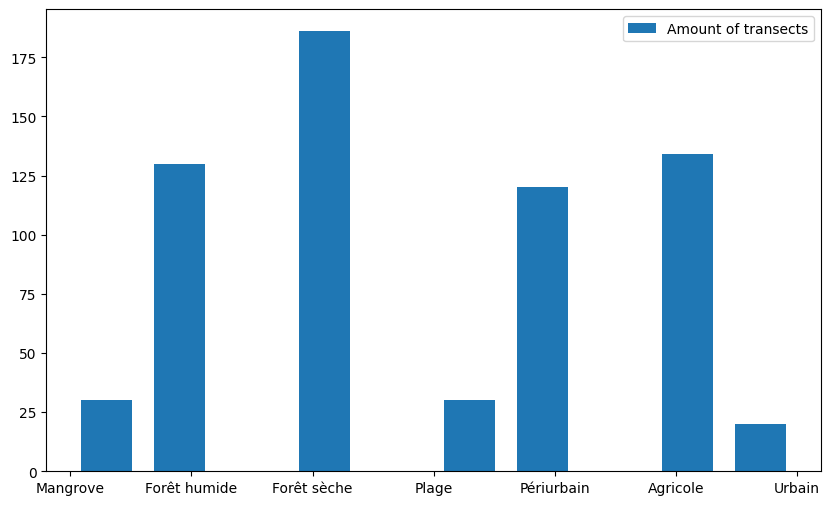

In [73]:

plt.figure(figsize = (10, 6))

n, bins, patches = plt.hist(df_sites["Type"], label = "Amount of transects", rwidth  = 0.7)



plt.legend()
plt.show()

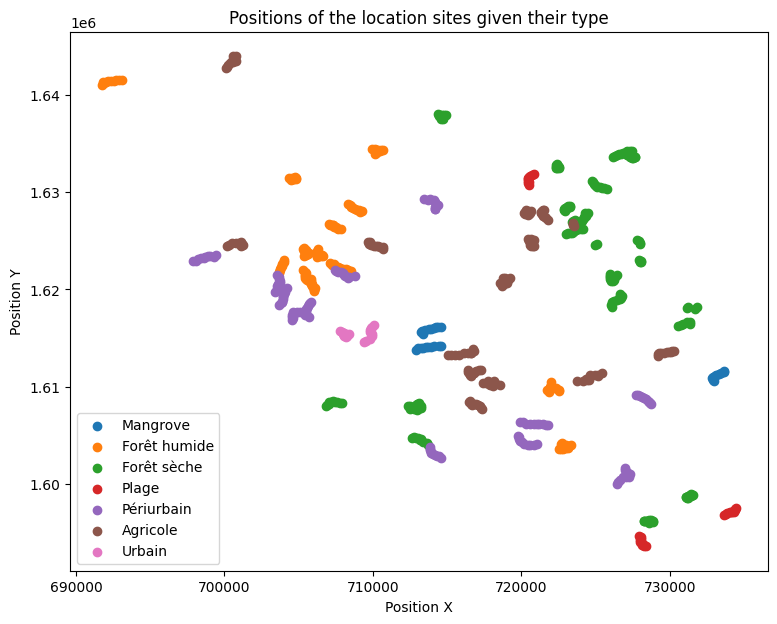

In [74]:

# Plotting the transects
import matplotlib
plt.figure(figsize = (9, 7))


locationTypes = df_sites["Type"].unique()


cmap = matplotlib.colormaps.get_cmap('tab10')

for i, t in enumerate(locationTypes):
    group = df_sites[df_sites["Type"] == t]
    plt.scatter(group["X"], group["Y"], label = t, color = cmap(i))

plt.title("Positions of the location sites given their type")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.legend()
plt.savefig("figures/positions.jpeg")
plt.show()


In [75]:
# Now let's vectorize columns in the observations

#for i, specie in enumerate(df_species["French Name"]):
#    df_observations.loc[df_observations["ESPECE"] == specie, "ESPECE"] = i


def cast_as_float(x):
    if x == " " or x == np.nan:
        return np.nan
    else:
        return float(x)
df_observations["nuages"] = df_observations["nuages"].apply(cast_as_float)



In [76]:

def plot_distribution(ax, x, xlabel, ylabel, title):
    Nbins = len(x.unique())
    length = len(x)
    counts, bins, patches = ax.hist(x)


    for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
        x = (bin_left + bin_right) / 2
        y = count
        label = f"{(100*count / length):.3f}"
    
        if y > 0:
            ax.text(x, y, label+ "%", ha = 'center', va='bottom')

    for i, patch in enumerate(patches):
        patch.set_facecolor(cmap(i / len(patches)))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    


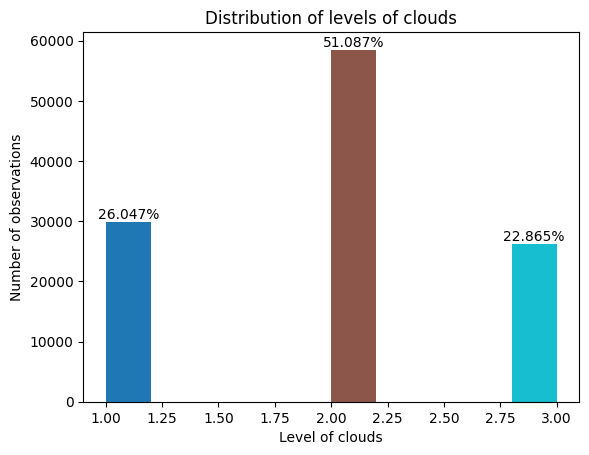

In [77]:
fig, ax = plt.subplots()

plot_distribution(ax, df_observations["nuages"], "Level of clouds", "Number of observations", "Distribution of levels of clouds" )
plt.savefig("figures/cloudLevel.jpeg")


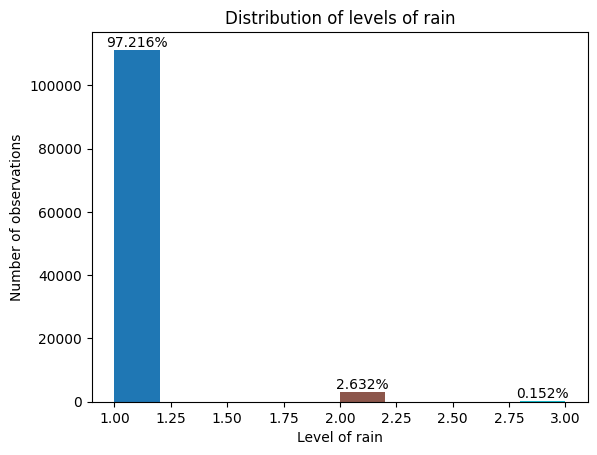

In [78]:
fig, ax = plt.subplots()
plot_distribution(ax,df_observations["pluie"], "Level of rain", "Number of observations", "Distribution of levels of rain" )
plt.savefig("figures/rainLevel.jpeg")

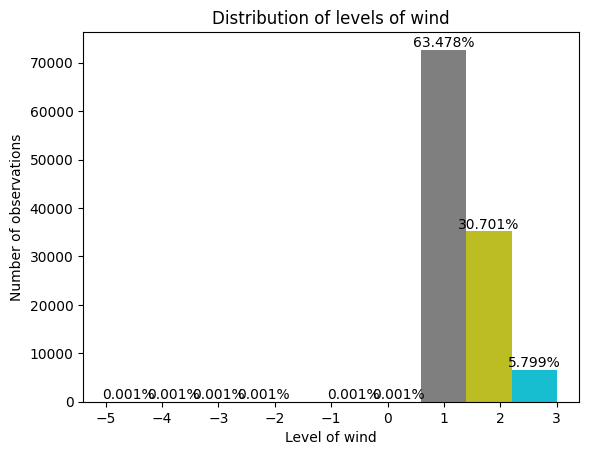

In [82]:
fig, ax = plt.subplots()
plot_distribution(ax, df_observations["vent"], "Level of wind", "Number of observations", "Distribution of levels of wind" )
plt.savefig("figures/windLevel.jpeg")


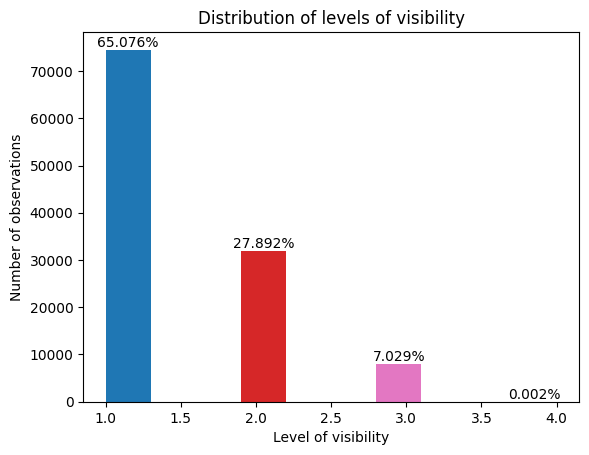

In [79]:
fig, ax = plt.subplots()
plot_distribution(ax, df_observations["visibilité"], "Level of visibility", "Number of observations", "Distribution of levels of visibility" )
plt.savefig("figures/visibilityLevel.jpeg")


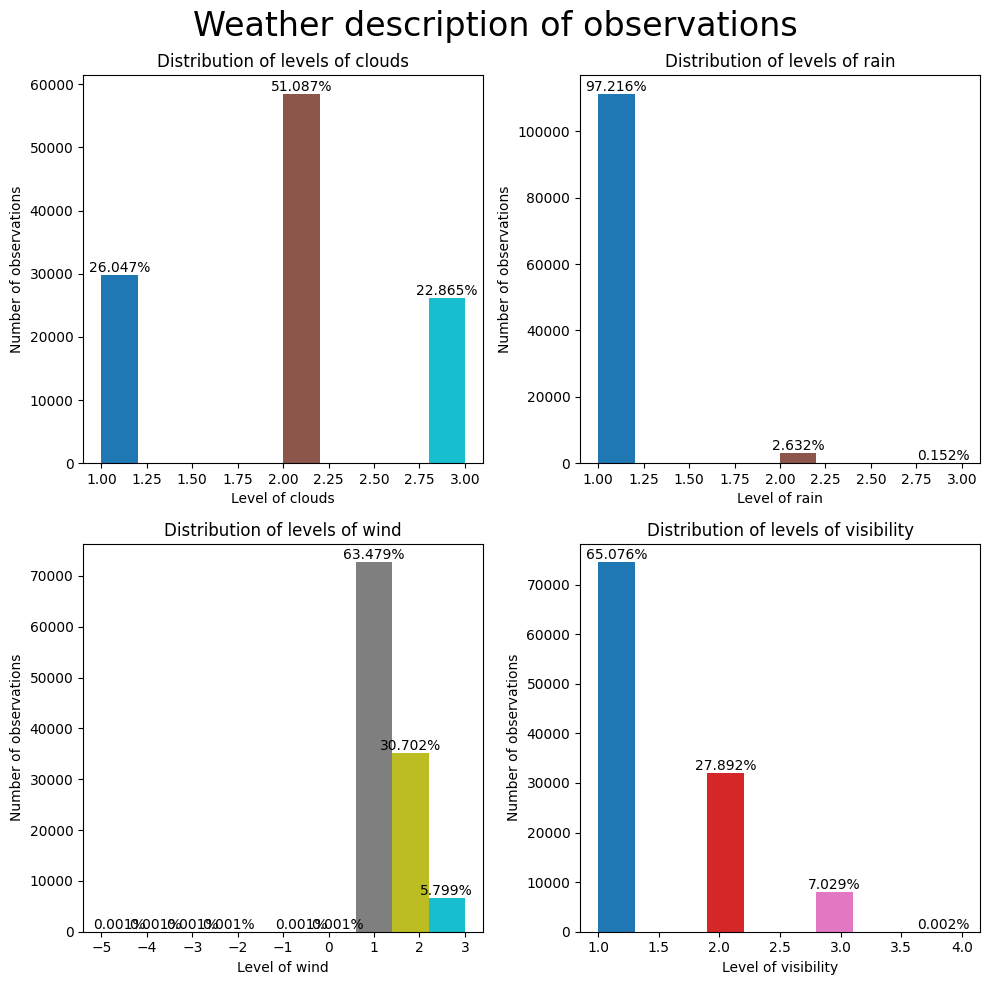

In [80]:
#now lets's show all of it on one figure

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
fig.suptitle("Weather description of observations", fontsize = 24)


plot_distribution(axes[0, 0], df_observations["nuages"], "Level of clouds", "Number of observations", "Distribution of levels of clouds" )

plot_distribution(axes[0, 1],df_observations["pluie"], "Level of rain", "Number of observations", "Distribution of levels of rain" )

plot_distribution(axes[1, 0], df_observations["vent"], "Level of wind", "Number of observations", "Distribution of levels of wind" )

plot_distribution(axes[1, 1], df_observations["visibilité"], "Level of visibility", "Number of observations", "Distribution of levels of visibility" )


plt.tight_layout()
plt.savefig("figures/weather.jpeg")
plt.show()

In [81]:
# let's look for sites with fewer than 10 completed visits
visited = df_observations["Nom transect"].value_counts()

fewVisited = visited[visited < 10]
print(f"There are {len(fewVisited)} transects who have been visited less than 10 times")
print(fewVisited)

There are 1 transects who have been visited less than 10 times
Nom transect
BORELIE    5
Name: count, dtype: int64


The average of species per site is 33.23 and the standard deviation is 7.25.
Nom transect
Canal Dillon          41
Hôtel des Plaisirs    43
Lafayette             44
Canal Cocotte         44
Fond Rousseau         45
Génipa                45
Aéroport              46
Autre Bord            48
Name: ESPECE, dtype: int64


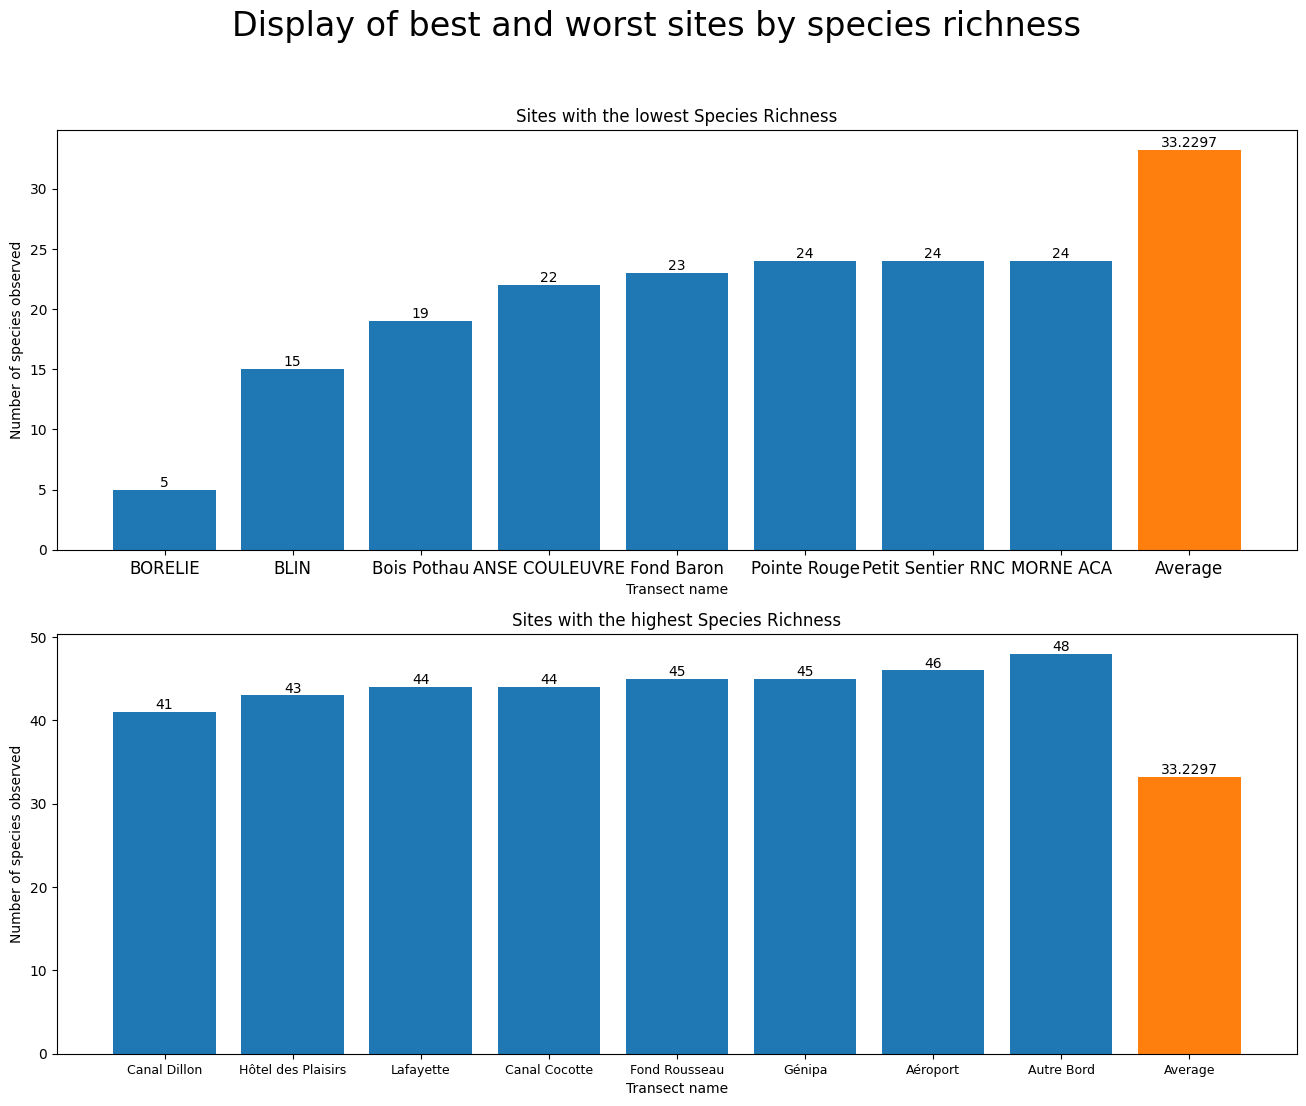

In [82]:
grouped = df_observations.groupby("Nom transect")["ESPECE"].nunique()


mean = grouped.mean()
var = grouped.std()

print(f"The average of species per site is {mean:.2f} and the standard deviation is {var:.2f}.")

sorted = grouped.sort_values()

nSites = 8

poorest = sorted[:nSites]

richest = sorted[-nSites:]

fig, axes = plt.subplots(2, figsize=(16, 12))
fig.suptitle("Display of best and worst sites by species richness", fontsize = 24)

valsPooor = np.array([val for key, val in poorest.items()])

valsRich = np.array([val for key, val in richest.items()])

bars1 = axes[0].bar(poorest.keys(), valsPooor)
axes[0].bar_label(bars1)
axes[0].tick_params(axis = 'x', labelsize = 12)
axes[0].set_xlabel("Transect name")
axes[0].set_ylabel("Number of species observed")
axes[0].set_title(f"Sites with the lowest Species Richness")
meanBar = axes[0].bar("Average", mean)
axes[0].bar_label(meanBar)

bars2 = axes[1].bar(richest.keys(), valsRich)
axes[1].bar_label(bars2)
axes[1].set_xlabel("Transect name")
axes[1].set_ylabel("Number of species observed")

axes[1].set_title("Sites with the highest Species Richness")
axes[1].tick_params(axis = 'x', labelsize = 9)
meanBar = axes[1].bar("Average", mean)
axes[1].bar_label(meanBar)
print(richest)
#plt.tight_layout()
plt.savefig("figures/richnessSite.jpeg")

In [83]:
#Now let's do the same for the habitats

df_observations['date'] = pd.to_datetime(df_observations['date'])


In [84]:
df_observations['year'] = df_observations['date'].dt.year


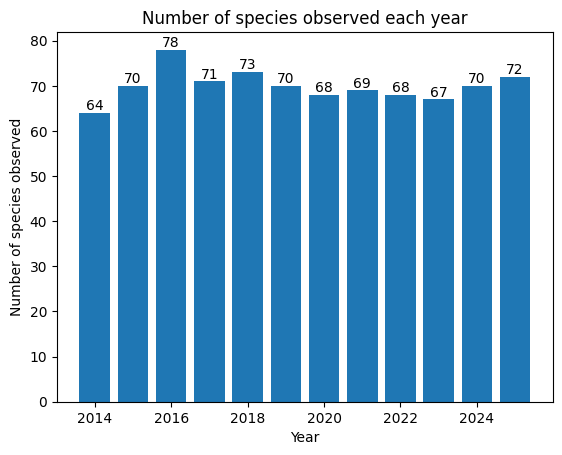

In [85]:
groupedYear = df_observations.groupby('year')['ESPECE'].nunique()

bars = plt.bar(groupedYear.keys(), groupedYear.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of species observed")
plt.title("Number of species observed each year")
plt.savefig("figures/speciesPerYear.jpeg")

[Text(0, 0, '9541.25')]

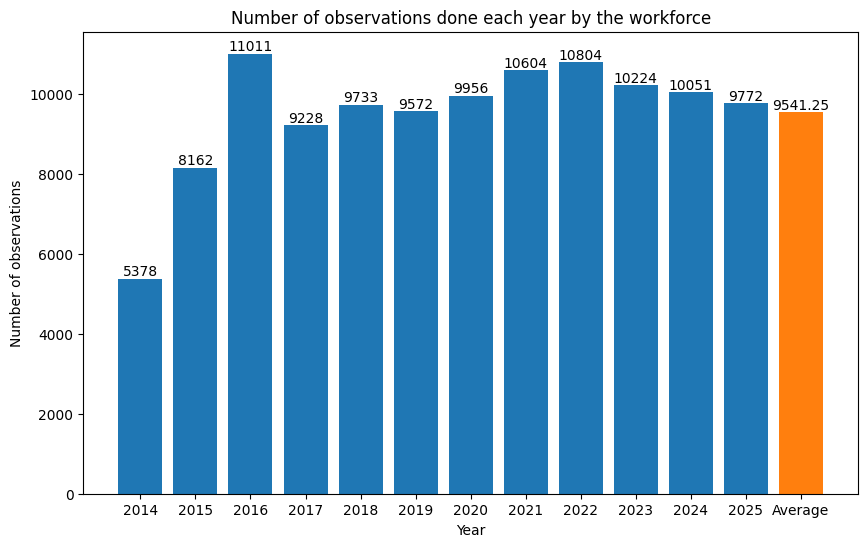

In [124]:
# now for the workload
observationsYear = df_observations.groupby('year')['ESPECE'].count()
plt.figure(figsize=(10, 6))  # width=10 inches, height=6 inches
bars = plt.bar(observationsYear.keys().astype(str), observationsYear.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of observations")
plt.title("Number of observations done each year by the workforce")
plt.savefig("figures/observationsYear.jpeg")

mean = observationsYear.mean()
plt.bar_label(plt.bar("Average", mean))

In [97]:
# species and how many times they have been observed


countEspeces = df_observations["ESPECE"].value_counts()

print(len(df_observations["ESPECE"].unique()))

print(len(countEspeces[countEspeces == 1]))

103
8


In [98]:
import unicodedata

def normalize_species(s):
    if pd.isna(s):
        return s
    s = str(s)
    s = s.strip()                         # remove leading/trailing spaces
    s = " ".join(s.split())               # normalize internal spacing
    s = s.lower()                         # lowercase
    s = unicodedata.normalize("NFKC", s)  # normalize unicode accents
    return s

df_species["clean_name"] = df_species["French Name"].apply(normalize_species)
df_observations["clean_espece"] = df_observations["ESPECE"].apply(normalize_species)

In [99]:
not_in_species = df_observations.loc[
    ~df_observations["clean_espece"].isin(df_species["clean_name"]),
    "ESPECE"
].unique()
print(not_in_species)

print('Trochilidae' in not_in_species)

count = 0
for val in df_observations["ESPECE"]:
    if val in not_in_species:
        count += 1

print(count)




['Trochilidae' 'Columbidae' 'Estrildidae' 'RAS' 'Limicole' 'Hirundinidae'
 'Apodidae' 'Fauconidae' 'Sterne sp' 'Mimidae ' 'Moqueur  sp.'
 'Lonchura sp.' 'Bécasseau semipalmé' 'trochilidae' 'Anatidae' 'Martinet'
 'Pigeon à cou rouge' 'Egretta sp.' 'Capucin sp' 'Gallinacées' 'Falconidé'
 'Héron ?']
True
1216


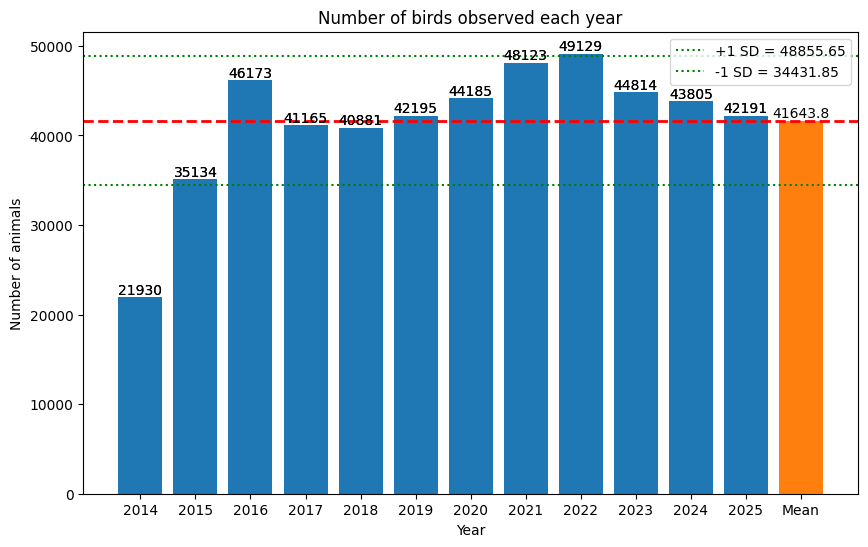

In [129]:
amountGrouped = df_observations.groupby('year')["Amount"].sum()
plt.figure(figsize=(10, 6))  # width=10 inches, height=6 inches

bars = plt.bar(amountGrouped.keys().astype(str), amountGrouped.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of animals")
plt.title("Number of birds observed each year")

mean = amountGrouped.mean()
meanBar = plt.bar("Mean", mean)
plt.bar_label(bars)
plt.bar_label(meanBar)

std = amountGrouped.std()

plt.axhline(mean, color='red', linestyle='--', linewidth=2)
plt.axhline(mean + std, color='green', linestyle=':', linewidth=1.5, label=f'+1 SD = {mean+std:.2f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=1.5, label=f'-1 SD = {mean-std:.2f}')
plt.legend()
plt.savefig("figures/amountYear.jpeg")

In [101]:
print(amountGrouped.values.sum() == df_observations["Amount"].sum())

True


0.1424122507496781


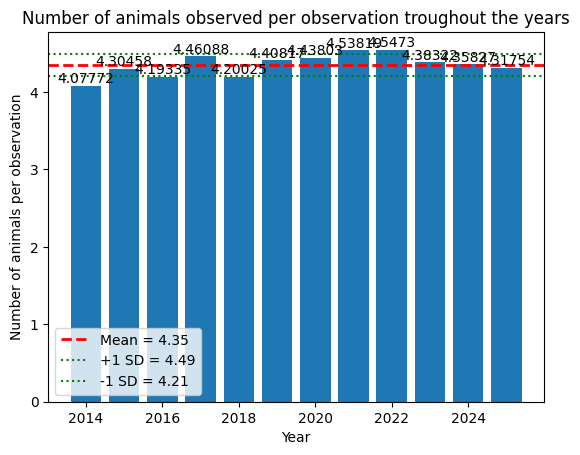

In [109]:
animalsPerObservations = amountGrouped / observationsYear


bars = plt.bar(animalsPerObservations.keys(), animalsPerObservations.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of animals per observation")
plt.title("Number of animals observed per observation troughout the years")

mean = animalsPerObservations.mean()
std = animalsPerObservations.std()

plt.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.2f}')
plt.axhline(mean + std, color='green', linestyle=':', linewidth=1.5, label=f'+1 SD = {mean+std:.2f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=1.5, label=f'-1 SD = {mean-std:.2f}')

plt.legend()


plt.savefig("figures/amountYearNorm.jpeg")

print(animalsPerObservations.std())

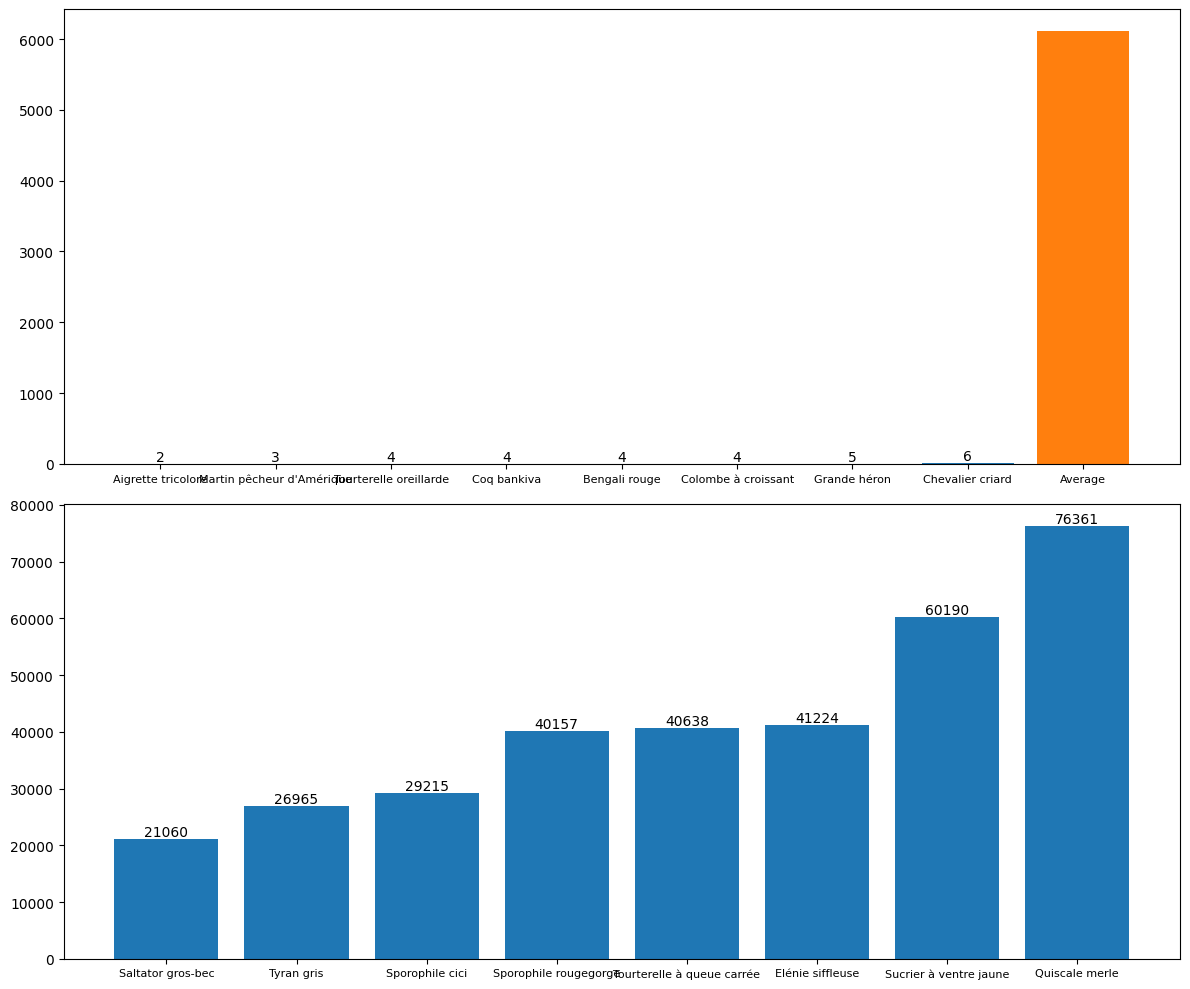

In [ ]:
df_observations2 = df_observations[np.array([ not(x in not_in_species) for x in df_observations["ESPECE"]]) ]

amountPerSpecie =  df_observations2.groupby("ESPECE")["Amount"].sum()
amountSorted= amountPerSpecie.sort_values()
leastAppeared = amountSorted[:8]
mostAppeared = amountSorted[-8:]

fig, axes = plt.subplots( 2, 1, figsize =(12, 10))

mean = amountPerSpecie.mean()
barslow = axes[0].bar(leastAppeared.keys(), leastAppeared.values)


barshigh = axes[1].bar(mostAppeared.keys(), mostAppeared.values)
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)


axes[0].bar_label(barslow)
axes[1].bar_label(barshigh)
axes[1].bar_label(plt.bar("Average", mean))

fig.tight_layout()